In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
data = pd.read_csv('/kaggle/input/forest-fires-in-brazil/amazon.csv',encoding = "ISO-8859-1",parse_dates=['date'])
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [5]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [6]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [7]:
data.tail(-5)

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [8]:
data.shape

(6454, 5)

In [9]:
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 6454
Number of columns 5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [11]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [12]:
data_dup=data.duplicated().any()
print("Any dup data",data_dup)

Any dup data True


In [13]:
data = data.drop_duplicates()
data.shape

(6422, 5)

In [17]:
data1=data.groupby('month')['number'].sum().reset_index()
data1

,month,number
0,Abril,28184.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30839.050
4,Janeiro,47681.844
5,Julho,92319.113
6,Junho,55997.675
7,Maio,34725.363
8,Março,30709.405
9,Novembro,85508.054


<Axes: xlabel='month', ylabel='number'>

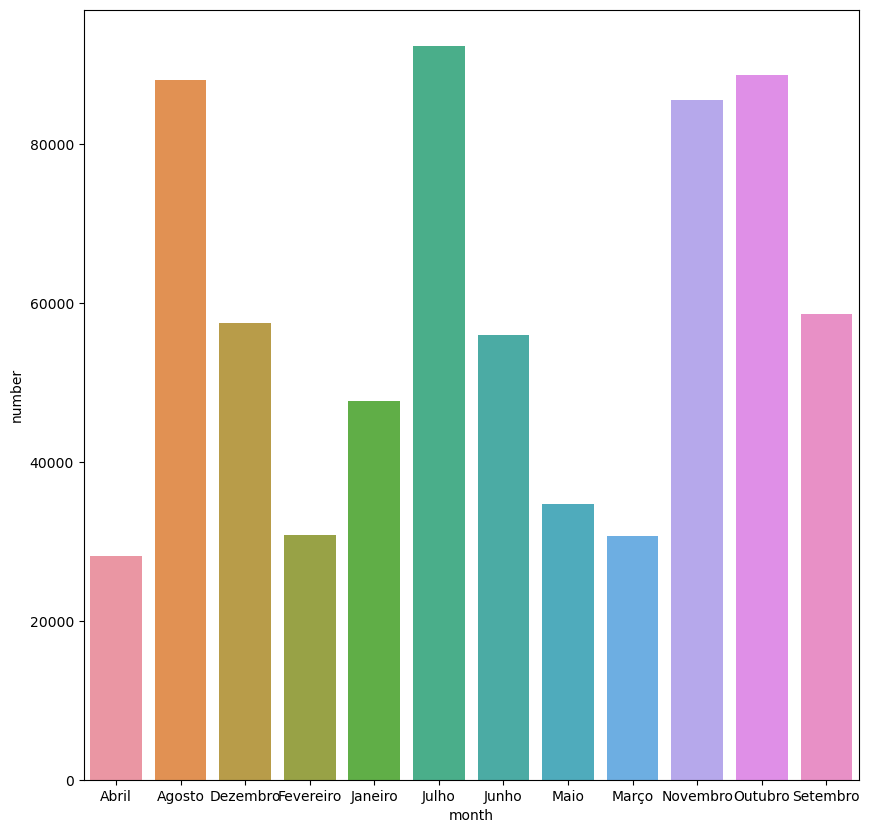

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(x="month",y="number",data=data1)

In [20]:
data2=data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

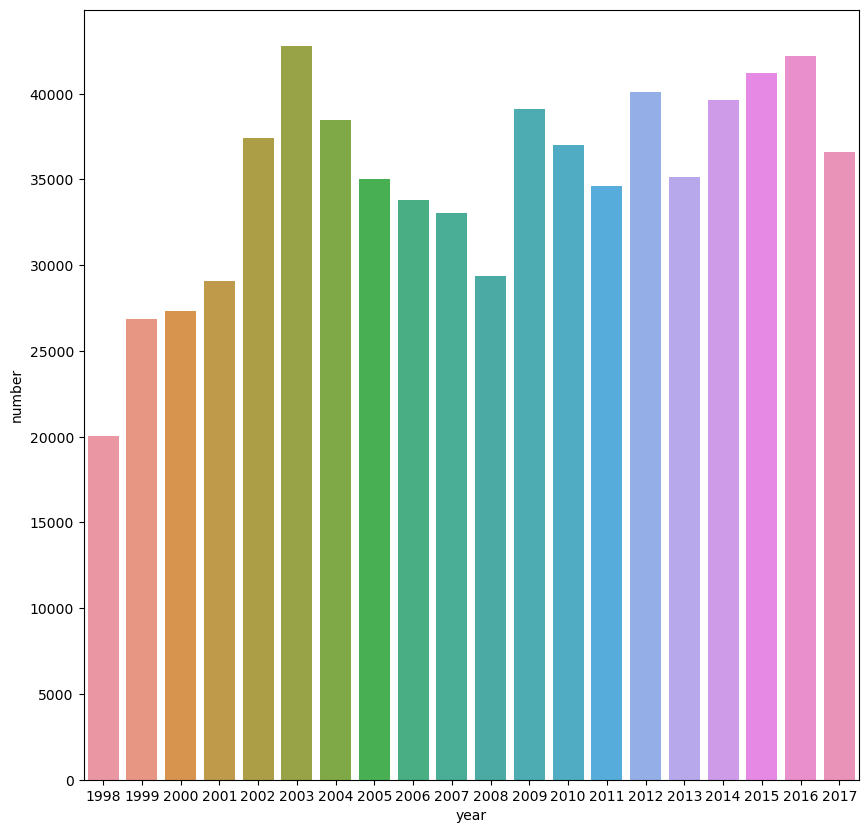

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x="year",y="number",data=data2)

In [24]:
data3=data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


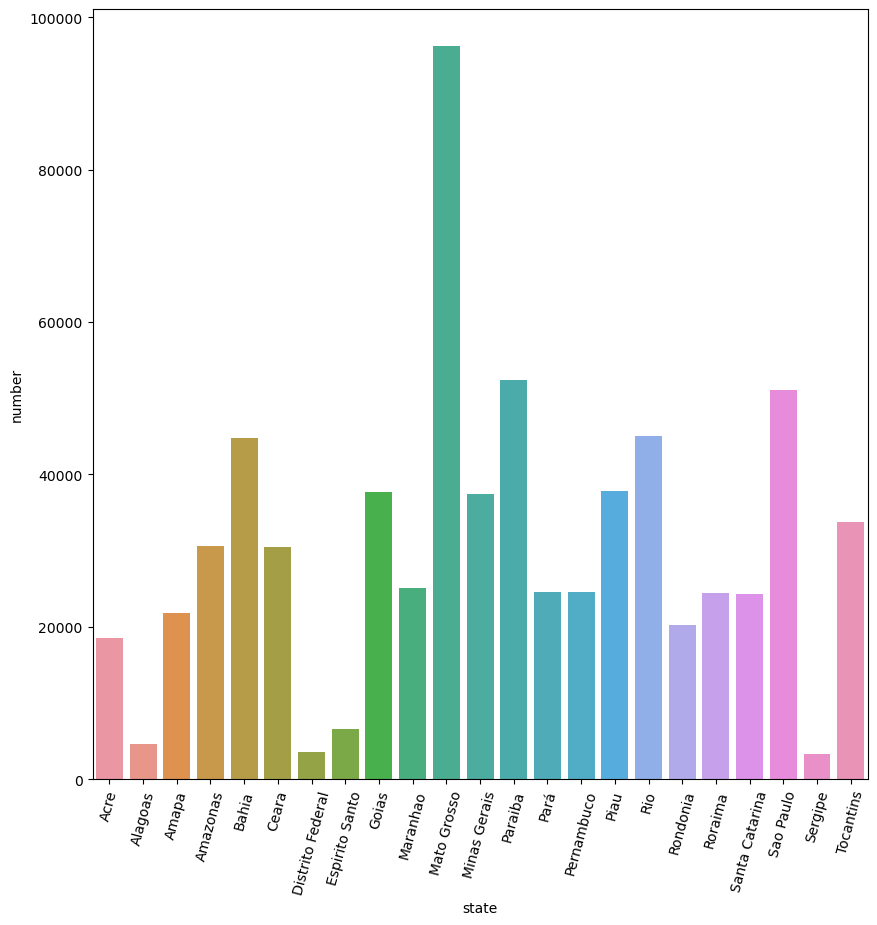

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(x="state",y="number",data=data3)
plt.xticks(rotation=75)
plt.show()

In [29]:
data[data['state']=="Amazonas"]['number'].sum()

30650.129

In [33]:
data4=data[data['state']=="Amazonas"]
day=data4.groupby(data4['date'].dt.dayofweek).sum().number
import calendar
day.index=[calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()

/tmp/ipykernel_32/3558563310.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day=data4.groupby(data4['date'].dt.dayofweek).sum().number


In [34]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

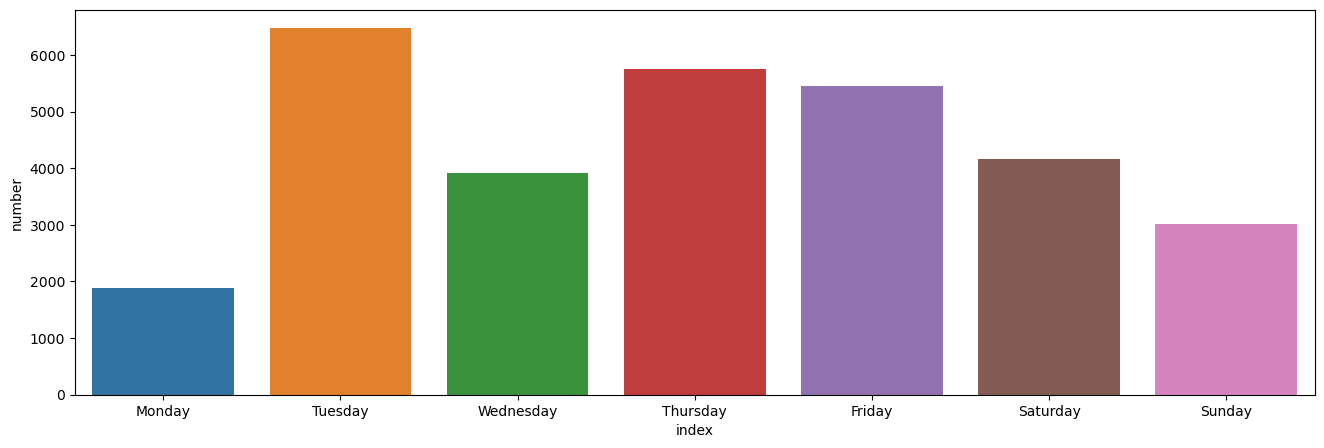

In [35]:
plt.figure(figsize=(16,5))
sns.barplot(x="index",y="number",data=day)

In [36]:
data7=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


<Axes: xlabel='state', ylabel='number'>

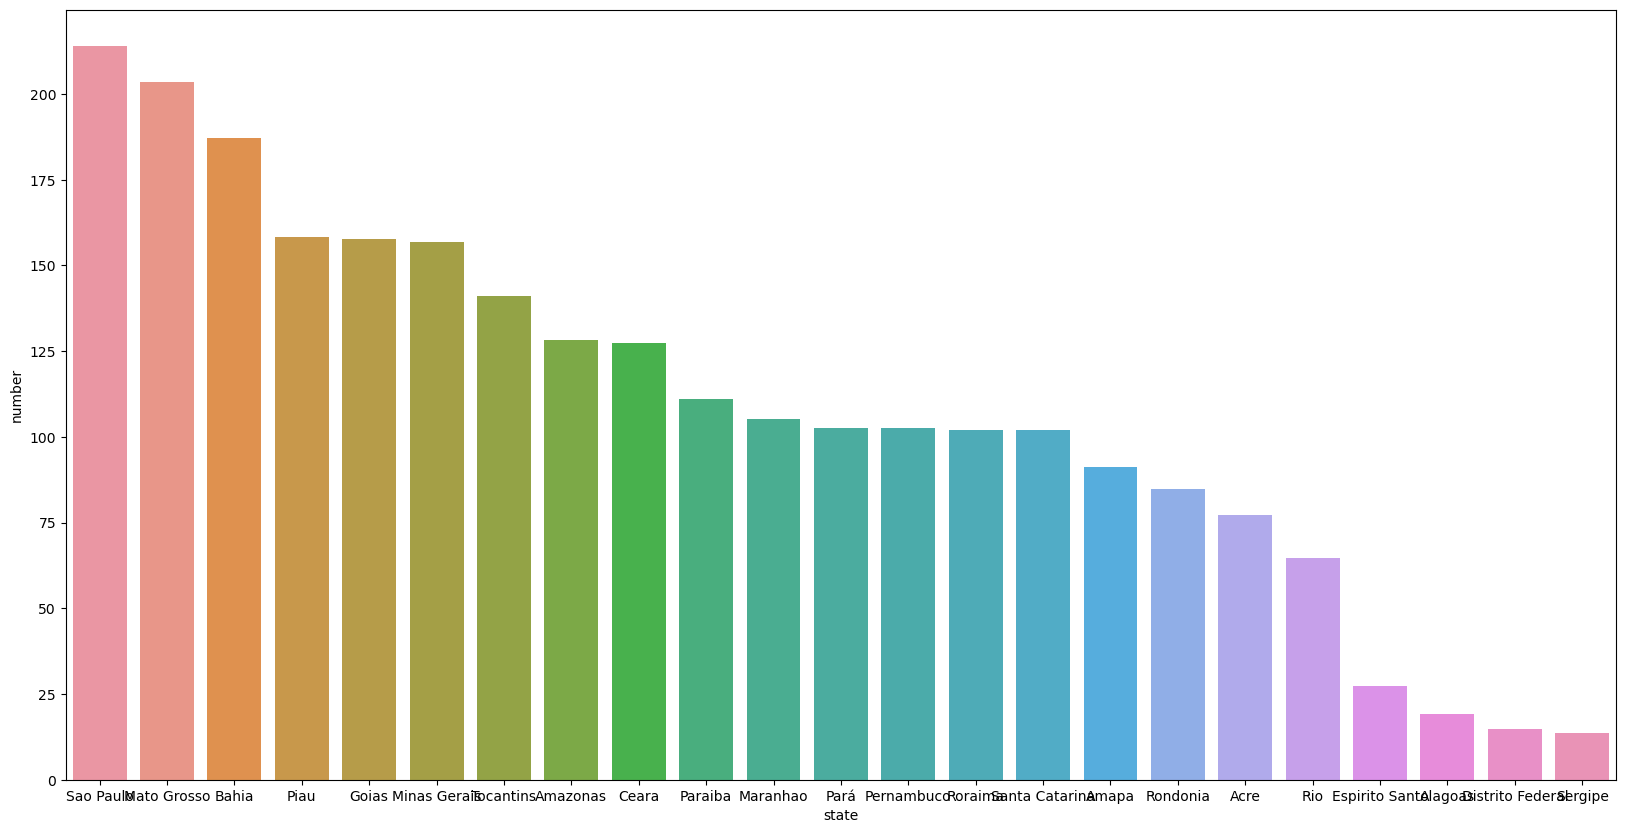

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x="state",y="number",data=data7)